# Distancias

Usaremos el paquete `distance_matrix` de la librería `scipy.spatial`

In [1]:
from scipy.spatial import distance_matrix
import pandas as pd

In [2]:
data = pd.read_csv("../../../../GitHub/python-ml-course/datasets/movies/movies.csv", sep = ";")
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


Como no me interesa `userid` para el cálculo de las distancias, vamos a recopilar el resto de columnas.

In [3]:
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [4]:
# Una matriz con la distancia de Manhattan
dd1 = distance_matrix(data[movies],data[movies], p=1)
# Otra matriz con la distancia euclídea
dd2 = distance_matrix(data[movies],data[movies], p=2)
# Otra matriz con una potencia de minkowski cualquiera
dd10 = distance_matrix(data[movies],data[movies], p=10)

El resultado queda como un array. Definimos una función para transformar las matrices que hemos creado a DataFrame.

In [5]:
def DistanceM_todf(dd, reference):
    import pandas as pd
    return pd.DataFrame(dd, index = reference, columns= reference)

In [6]:
DistanceM_todf(dd1, data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [7]:
DistanceM_todf(dd2,data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [8]:
DistanceM_todf(dd10, data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


Vemos que al incrementar el índice de la distancia de Minkowski, las distancias se van acercando.

Una buena forma de ver estas distancias es representándolas en 3D. Para ello usaremos `matplotlib.pylot` y el paquete `Axes3D` de `mpl_toolkits.mplot3d`.

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

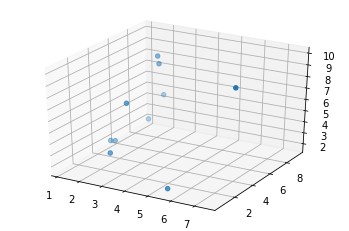

In [10]:
# Creamos una figura vacía con ejes en 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d") # 111 se indica para la escala de los 3 ejes = 1

# Por ahora tenemos la figura vacía. Pintamos el Scatterplot
ax.scatter(xs = data['star_wars'], ys=data['lord_of_the_rings'],zs = data['harry_potter'])

## Enlaces

Recrearemos manualmente como se produce el proceso de clustering a partir de la matriz de distancias Manhattan

In [11]:
df = DistanceM_todf(dd1, data['user_id'])
df

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [12]:
Z=[] # será la matriz en la que añadiremos los grupos y las distancias

Primero identificamos que los puntos con la mínima distancia son el `1` respecto al `10`. 

Creamos una nueva columna `11` en la que uniremos ambos puntos, tanto por columnas como por filas.

In [13]:
df[11]=df[1]+df[10]
df.loc[11]=df.loc[1]+df.loc[10]
Z.append([1,10,0.7,2]) # id1, id2, distancia, n_elementos en el cluster -> 11.
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


Ahora habría que recalcular las distancias a cada uno de los puntos. Usaremos el método de **enlace simple** para recalcular las distancias tanto por filas como por columnas. Es decir, se recalcula la distancia de cada punto a los puntos que ahora se han juntado en un grupo.

In [14]:
for i in df.columns.values.tolist(): # indexamos con los nombres de columna porque son números
    df.loc[11][i] = min(df.loc[1][i], df[10][i])
    df.loc[i][11] = min(df.loc[i][1], df[i][10])
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


Y ahora puedo eliminar los elmentos que ya han sido agrupados.

In [15]:
df = df.drop([1,10])
df = df.drop([1,10], axis = 1)
df

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


Ahora repetimos el procedimiento buscando la mínima distancia que aparezca entre individuos. Esta resulta darse entre 2 y 7.

In [16]:
x = 2
y = 7

n = 12

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2]) # id1, id2, distancia, n_elementos en el cluster -> 11.

for i in df.columns.values.tolist(): # indexamos con los nombres de columna porque son números
    df.loc[n][i] = min(df.loc[x][i], df[y][i])
    df.loc[i][n] = min(df.loc[i][x], df[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


Vemos, por ejemplo, que la distancia entre el 6 y el 12 (6,2), proviene de la distancia mínima de las distancias entre el punto 6 y 7 (6,2 y 7 respectivamente).

Seguimos repitiendo el procedimiento.

In [17]:
x = 5
y = 8

n = 13

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2]) # id1, id2, distancia, n_elementos en el cluster -> 11.

for i in df.columns.values.tolist(): # indexamos con los nombres de columna porque son números
    df.loc[n][i] = min(df.loc[x][i], df[y][i])
    df.loc[i][n] = min(df.loc[i][x], df[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,0.0,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,0.0,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,0.0,4.9,11.7,8.2
11,15.2,8.8,6.2,4.9,0.0,9.6,3.9
12,12.0,17.2,6.2,11.7,9.6,0.0,4.9
13,17.3,12.7,8.3,8.2,3.9,4.9,0.0


In [18]:
x = 11
y = 13

n = 14

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2]) # id1, id2, distancia, n_elementos en el cluster -> 11.

for i in df.columns.values.tolist(): # indexamos con los nombres de columna porque son números
    df.loc[n][i] = min(df.loc[x][i], df[y][i])
    df.loc[i][n] = min(df.loc[i][x], df[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,12.0,15.2
4,12.4,0.0,11.0,5.5,17.2,8.8
6,9.0,11.0,0.0,5.5,6.2,6.2
9,12.9,5.5,5.5,0.0,11.7,4.9
12,12.0,17.2,6.2,11.7,0.0,4.9
14,15.2,8.8,6.2,4.9,4.9,0.0


En este caso vemos que hay 2 distancias que son mínimas e iguales. Por tanto, habrá que juntar 3 puntos en este caso.

In [19]:
x = 9
y = 12
z = 14

n = 15

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],3]) # id1, id2, distancia, n_elementos en el cluster -> 11.

for i in df.columns.values.tolist(): # indexamos con los nombres de columna porque son números
    df.loc[n][i] = min(df.loc[x][i], df[y][i], df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df[i][y], df.loc[i][z])

df = df.drop([x,y,z])
df = df.drop([x,y,z], axis = 1)
df

user_id,3,4,6,15
user_id,,,,
3,0.0,12.4,9.0,12.0
4,12.4,0.0,11.0,5.5
6,9.0,11.0,0.0,5.5
15,12.0,5.5,5.5,0.0


In [20]:
x = 4
y = 6
z = 15

n = 16

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],3]) # id1, id2, distancia, n_elementos en el cluster -> 11.

for i in df.columns.values.tolist(): # indexamos con los nombres de columna porque son números
    df.loc[n][i] = min(df.loc[x][i], df[y][i], df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df[i][y], df.loc[i][z])

df = df.drop([x,y,z])
df = df.drop([x,y,z], axis = 1)
df

user_id,3,16
user_id,,
3,0.0,9.0
16,9.0,0.0


In [21]:
x = 3
y = 16

n = 17

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2]) # id1, id2, distancia, n_elementos en el cluster -> 11.

for i in df.columns.values.tolist(): # indexamos con los nombres de columna porque son números
    df.loc[n][i] = min(df.loc[x][i], df[y][i])
    df.loc[i][n] = min(df.loc[i][x], df[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

user_id,17
user_id,
17,0.0


Y en Z quedan todas las uniones que hemos realizado. Con esta tenemos toda la información necesaria para hacer un dibujo de las uniones.

In [22]:
Z

[[1, 10, 0.7, 2],
 [2, 7, 0.7999999999999994, 2],
 [5, 8, 3.2, 2],
 [11, 13, 3.900000000000001, 2],
 [9, 12, 11.7, 3],
 [4, 6, 11.0, 3],
 [3, 16, 9.0, 2]]

El procedimiento se resume gráficamente en el siguiente esquema y dendograma.

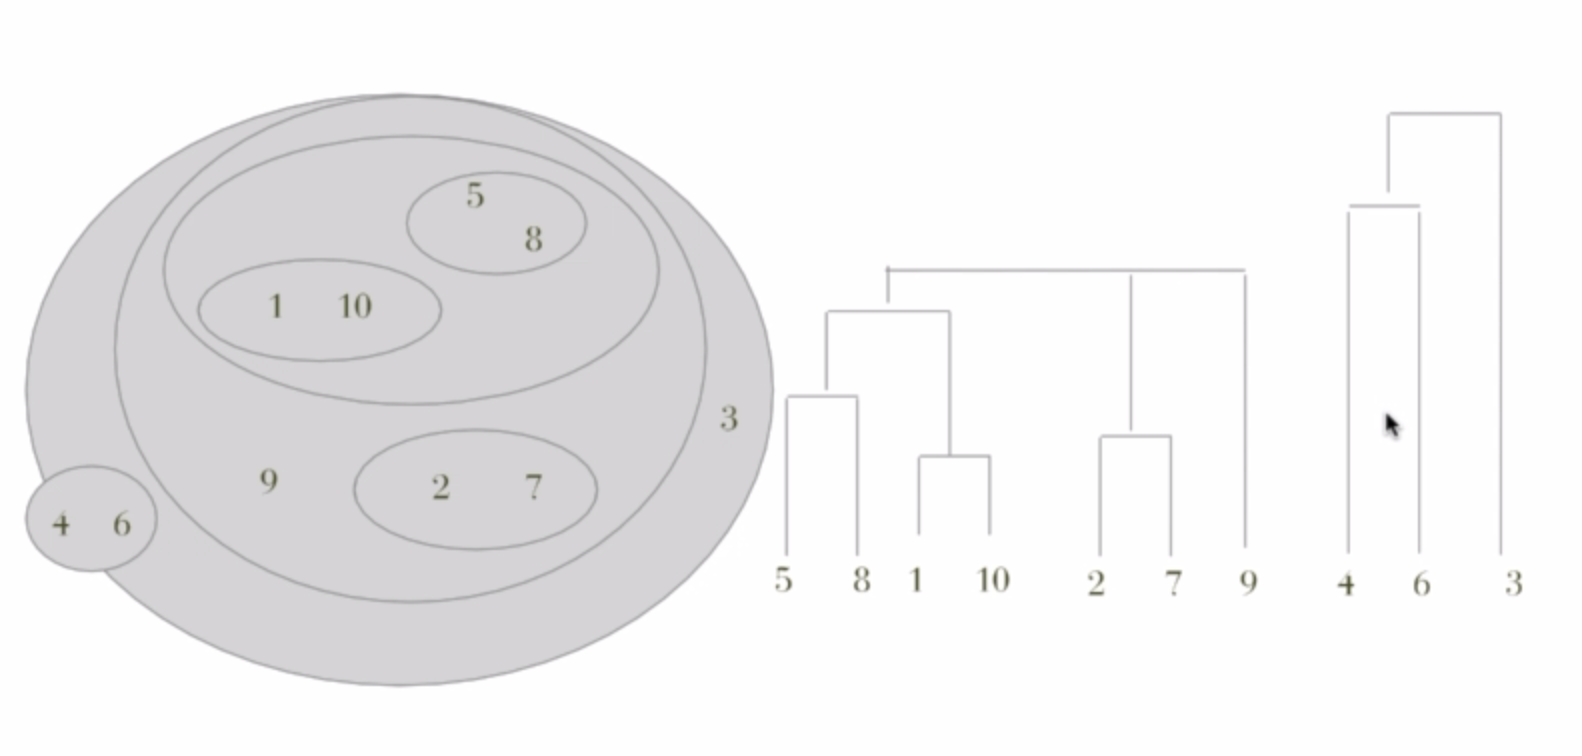

In [23]:
from IPython.display import Image
Image(filename="../resources/dendo.png")

## Clustering jerárquico

In [38]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [39]:
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

Obtenemos la matriz de grupos y enlaces mediante `linkage` y representamos.

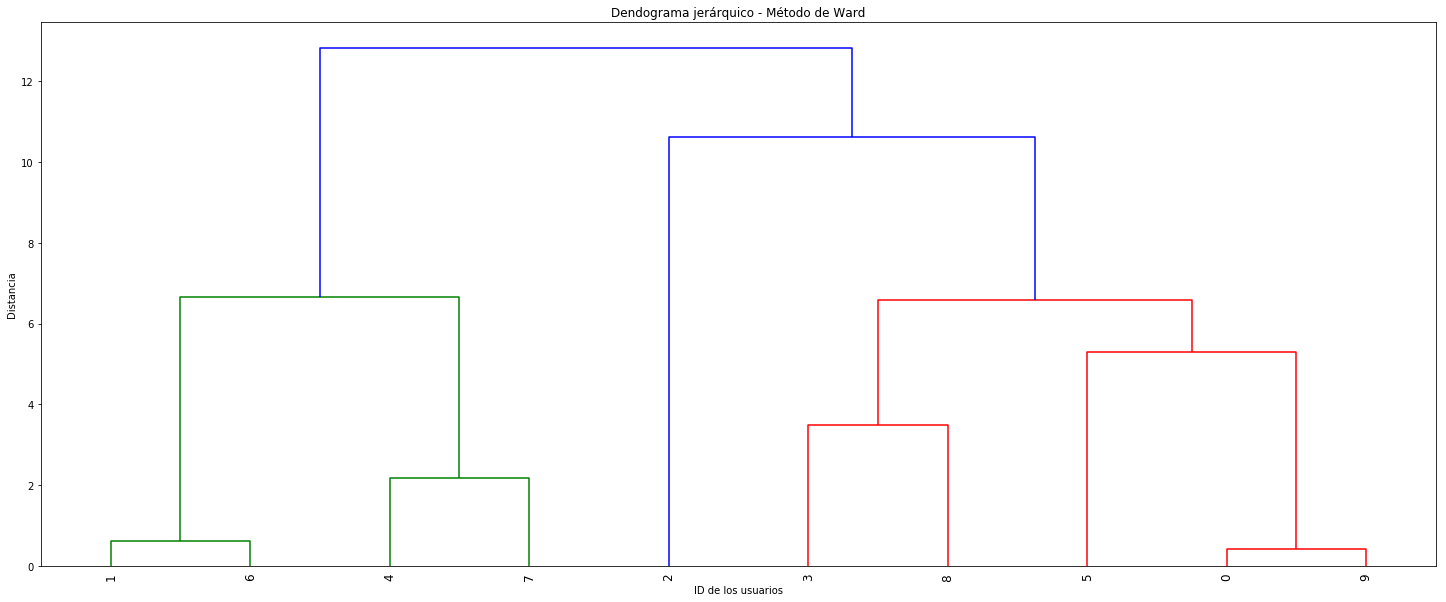

In [55]:
Z = linkage(data[movies], 'ward')
plt.figure(figsize=(25,10))
plt.title("Dendograma jerárquico - Método de Ward")
plt.xlabel("ID de los usuarios")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90.,leaf_font_size=12)
plt.show()

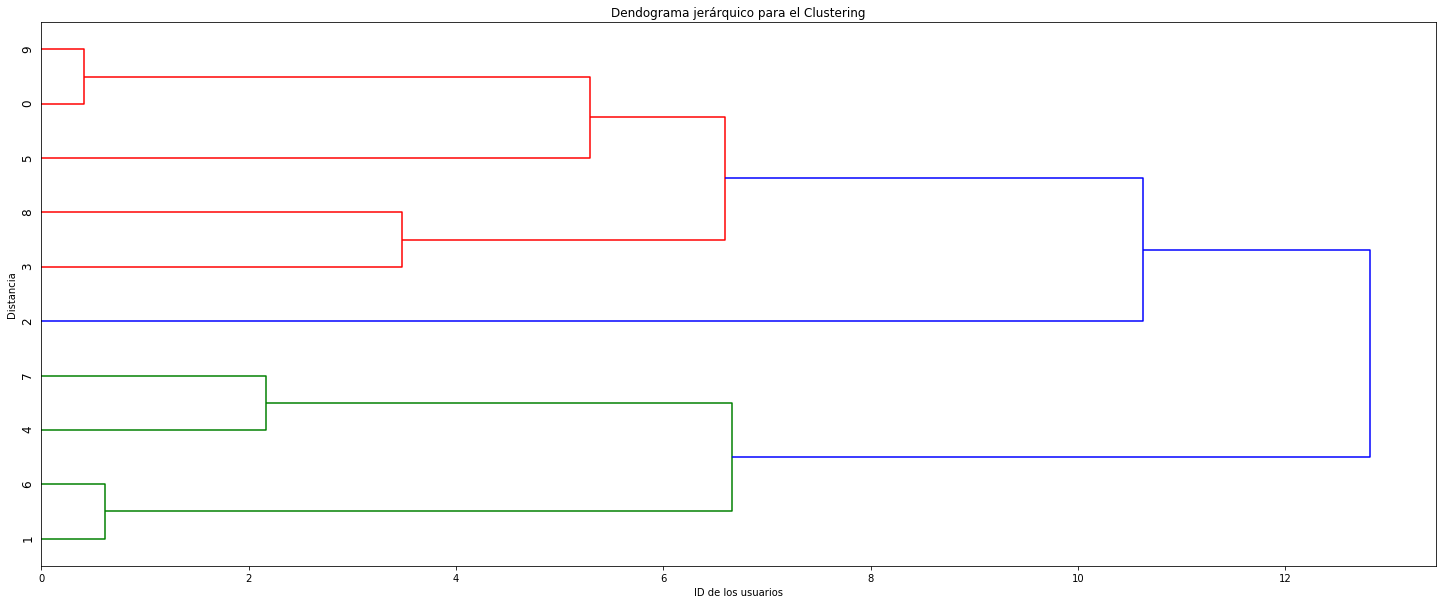

In [52]:
plt.figure(figsize=(25,10))
plt.title("Dendograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90.,leaf_font_size=12, orientation = "right")
plt.show()

Podemos probar con otro tipo de enlace para ver como queda el dendograma.

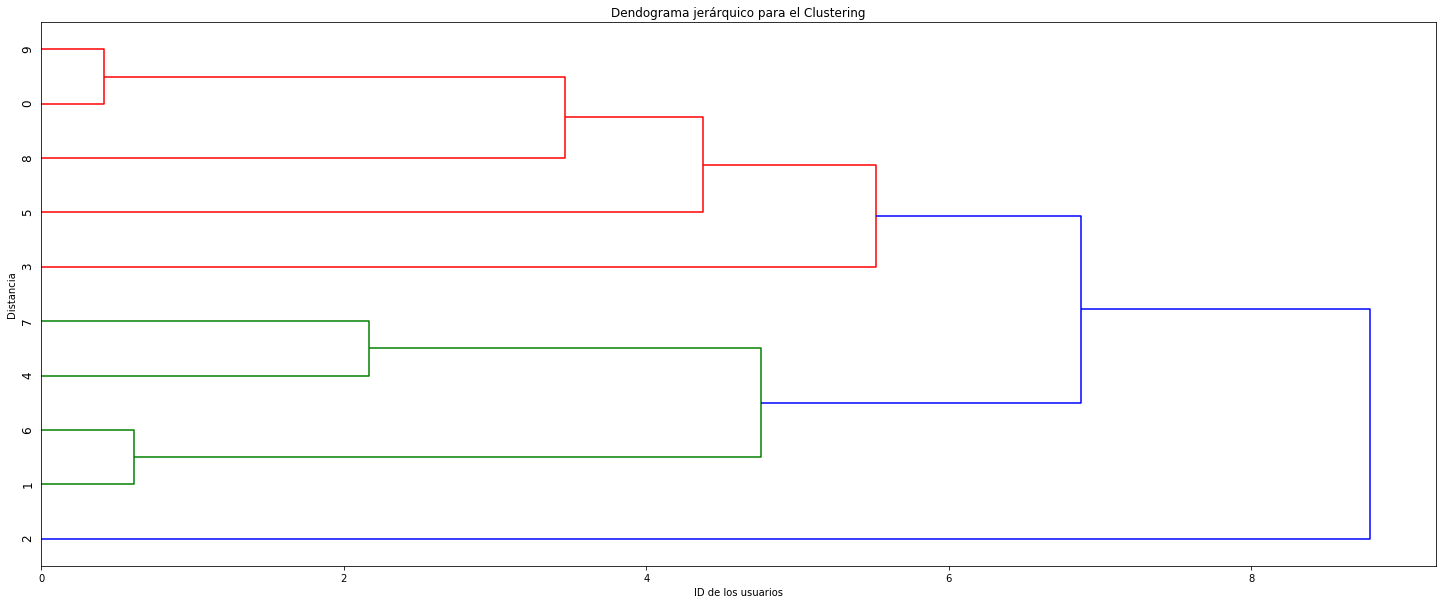

In [54]:
Z1 = linkage(data[movies], 'average')
plt.figure(figsize=(25,10))
plt.title("Dendograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios")
plt.ylabel("Distancia")
dendrogram(Z1, leaf_rotation=90.,leaf_font_size=12, orientation = "right")
plt.show()

Como vemos, no hay grandes diferencias entre ambos dendogramas, exceptuando cómo se enlazan los individuos en la rama de color rojo.

Los grupos más grandes tienden a guardar grandes similitudes.

Habrá que **elegir el método de enlace y la métrica de distancia en función de cuál se ajusta más al contexto de los datos que estamos tratando**. Esto se puede hacer dentro de la propia función `dendrogram` con el parámetro `metrics`.

También podemos seguir probando con los otros tipos de enlaces que hemos visto.

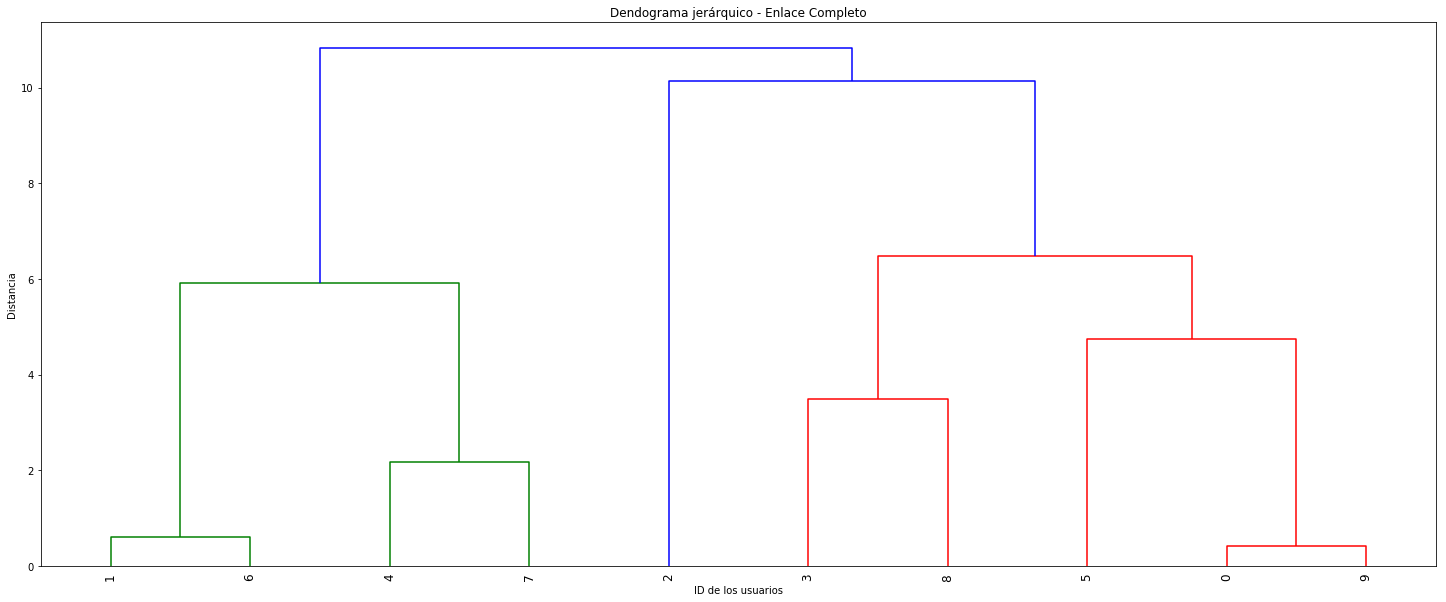

In [56]:
Z = linkage(data[movies], 'complete')
plt.figure(figsize=(25,10))
plt.title("Dendograma jerárquico - Enlace Completo")
plt.xlabel("ID de los usuarios")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90.,leaf_font_size=12)
plt.show()

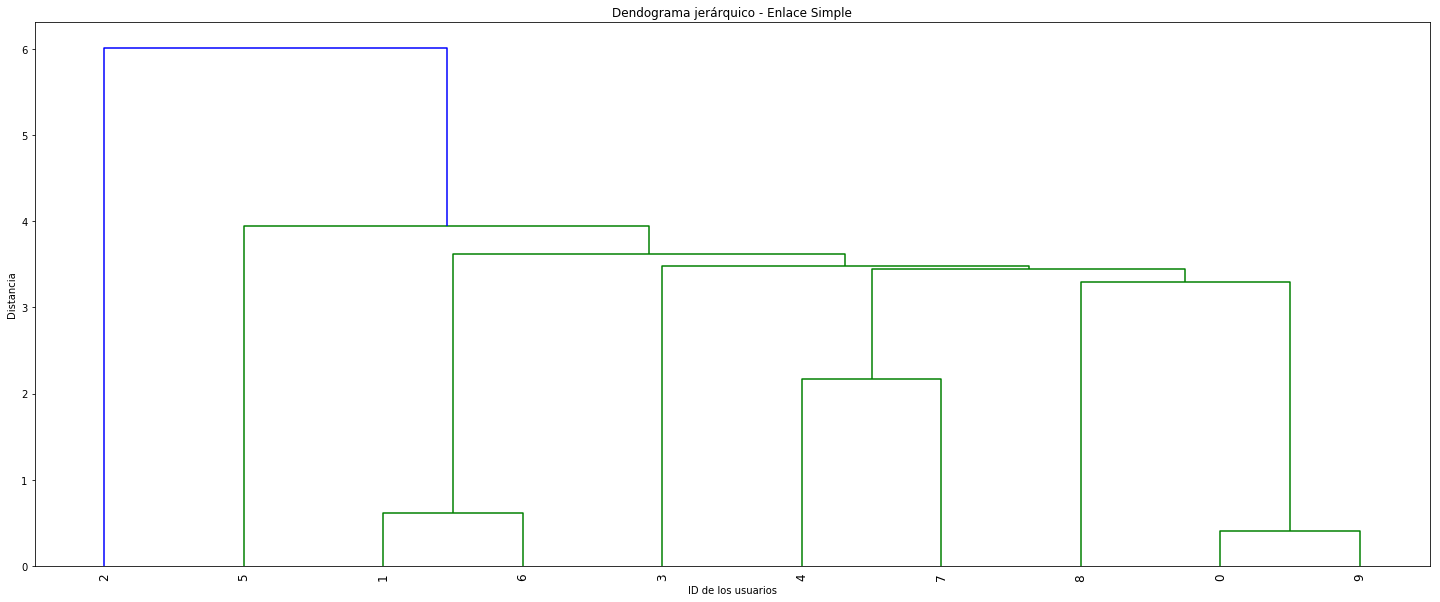

In [57]:
Z = linkage(data[movies], 'single')
plt.figure(figsize=(25,10))
plt.title("Dendograma jerárquico - Enlace Simple")
plt.xlabel("ID de los usuarios")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90.,leaf_font_size=12)
plt.show()

Como mencionamos antes, se puede indicar la métrica de distancia dentro de la función `dendrogram`, que por defecto trae la métrica `euclidean`. Los posibles valores de métricas que se pueden emplear son los siguientes (ver documentación `distance.pdist`):

`braycurtis`, `canberra`, `chebyshev`, `cityblock`, `correlation`, `cosine`, `dice`, `euclidean`, `hamming`, `jaccard`, `jensenshannon`, `kulsinski`, `mahalanobis`, `matching`, `minkowski`, `rogerstanimoto`, `russellrao`, `seuclidean`, `sokalmichener`, `sokalsneath`, `sqeuclidean`, `yule`.

La distancia de `manhattan` se corresponde con `cityblock`.